## Open a CSV file using Pandas

In [105]:
import pandas
df = pandas.read_csv('data.csv')
df.head(100)

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,Incremento,Error
0,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623,0.428571,0.247436
1,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587,0.200000,0.141421
2,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014,0.416667,0.186339
3,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695,0.235294,0.117647
4,2020-02-29 18:00:00,ITA,401,105,506,543,1049,228,50,29,1128,18661,0.380952,0.134687
5,2020-03-01 18:00:00,ITA,639,140,779,798,1577,528,83,34,1694,21127,0.172414,0.077106
6,2020-03-02 18:00:00,ITA,742,166,908,927,1835,258,149,52,2036,23345,0.529412,0.124784
7,2020-03-03 18:00:00,ITA,1034,229,1263,1000,2263,428,160,79,2502,25856,0.519231,0.099926
8,2020-03-04 18:00:00,ITA,1346,295,1641,1065,2706,443,276,107,3089,29837,0.354430,0.066981
9,2020-03-05 18:00:00,ITA,1790,351,2141,1155,3296,590,414,148,3858,32362,0.383178,0.059842


## Read a GeoJSON file

In [107]:
x=df.deceduti*1.
y=df.Incremento
dy=df.Error
xmin, xmax = min(x), max(x)

In [108]:
import numpy as np
Polynomial = np.polynomial.Polynomial

In [109]:
pfit = Polynomial.fit(x,y,1,window=(xmin,xmax),domain=(xmin,xmax),w=dy)

In [110]:
print('Raw fit results:', pfit, sep='\n')

Raw fit results:
poly([ 3.86583771e-01 -4.03898029e-05])


Fit: Y = -0.0000404[X] + 0.387 (rms residual = 0.09650)


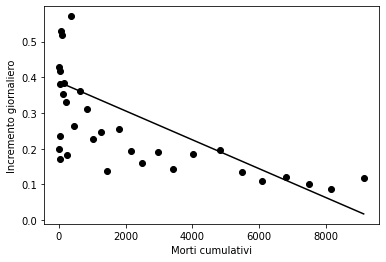

In [111]:
import pylab
x0, m = pfit
resid, rank, sing_val, rcond = stats
rms = np.sqrt(resid[0]/len(x))

print('Fit: Y = {:.7f}[X] + {:.3f}'.format(m, x0),
      '(rms residual = {:.5f})'.format(rms))

pylab.plot(x, y, 'o', color='k')
pylab.plot(x, pfit(x), color='k')
pylab.xlabel('Morti cumulativi')
pylab.ylabel('Incremento giornaliero')
pylab.show()

In [112]:
XMAX = -x0/m
print(XMAX)

9571.321042633079
